### Parameters to study

| Algorithm             | Step Size (lr) | Momentum Param | Regularization Param | Stochastic Aspect | Dataset_size |
|-----------------------|:--------------:|:-------------:|:--------------------:|:-----------------:| ------------:|
| Gradient              | X              |               |                     |                  |         |
| Accelerated Gradient  | X              | X             |                     |                  |        |
| Sub-gradient          | X              |               |                     |                  |       |
| Proximal Gradient     | X              |               | X                   |                  |      |
| Stochastic Gradient   | X              |               |                     | batch size/w or without shuffle                |


### for the svm problem
Modifying the distribution, the sample size and the c parameter

In [1]:
from functions import *


#set the seed
np.random.seed(0)


#set the number of samples and the dimension of the data
n = 10000
d = 100
#Generate a dataset
X, y = generate_dataset(n, d)
A = np.c_[np.ones(n), X]


In [5]:
import pandas as pd
import numpy as np

# Example of running each (completed) gradient-based method in functions.py 
# for a range of learning rates and storing the final objectives in a DataFrame.


# We assume that 'A' (shape (n,d+1)), 'y' (shape (n,)), and 'd' are already defined.
# We also assume the gradient methods in 'functions.py' are complete and can be called here.

learning_rates = [1e-3, 1e-2, 1e-1, 1.0]
num_iterations = 100
initial_x = np.zeros(A.shape[1])  # for example

labda = 10 # for proximal gradient and subgradient methods

results_list = []

# Add the full list of objective values to the results for each method
for lr_test in learning_rates:
    gd_objectives, gd_params = gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test)
    results_list.append({
        'method': 'GradientDescent',
        'lr': lr_test,
        'final_objective': gd_objectives[-1],
        'objectives': gd_objectives
    })

    agd_objectives, agd_params = accelerated_gradient_descent(y, A, initial_x.copy(), num_iterations)
    results_list.append({
        'method': 'AcceleratedGD',
        'lr': lr_test,
        'final_objective': agd_objectives[-1],
        'objectives': agd_objectives
    })

    prox_objectives, prox_params = prox_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=labda)
    results_list.append({
        'method': 'ProximalGD',
        'lr': lr_test,
        'final_objective': prox_objectives[-1],
        'objectives': prox_objectives
    })

    subg_objectives, subg_params = subgradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=labda)
    results_list.append({
        'method': 'Subgradient',
        'lr': lr_test,
        'final_objective': subg_objectives[-1],
        'objectives': subg_objectives
    })

    """sgd_objectives, sgd_params = stoc_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, batch_size=2)
    results_list.append({
        'method': 'StochasticGD',
        'lr': lr_test,
        'final_objective': sgd_objectives[-1],
        'objectives': sgd_objectives
    })"""

df_results = pd.DataFrame(results_list)
df_results


,method,lr,final_objective,objectives
0,GradientDescent,0.001,3.032630e+09,"[3720582361.1027884, 3712899958.121139, 370523..."
1,AcceleratedGD,0.001,9.663051e+05,"[38462051.91349719, 33079132.074709237, 203986..."
2,ProximalGD,0.001,3.125960e+09,"[3721661496.962818, 3715055045.587305, 3708461..."
3,Subgradient,0.001,3.125066e+09,"[3720582415.231378, 3713980471.8137717, 370738..."
4,GradientDescent,0.010,4.766321e+08,"[3651657571.7075872, 3576622612.5845537, 35031..."
5,AcceleratedGD,0.010,9.663051e+05,"[38462051.91349719, 33079132.074709237, 203986..."
6,ProximalGD,0.010,7.530902e+08,"[3662356261.0128016, 3597705473.1168413, 35343..."
7,Subgradient,0.010,7.512415e+08,"[3651658112.993482, 3587234697.5504127, 352398..."
8,GradientDescent,0.100,9.663137e+05,"[2998162829.0670595, 2412141620.787019, 194157..."
9,AcceleratedGD,0.100,9.663051e+05,"[38462051.91349719, 33079132.074709237, 203986..."


/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

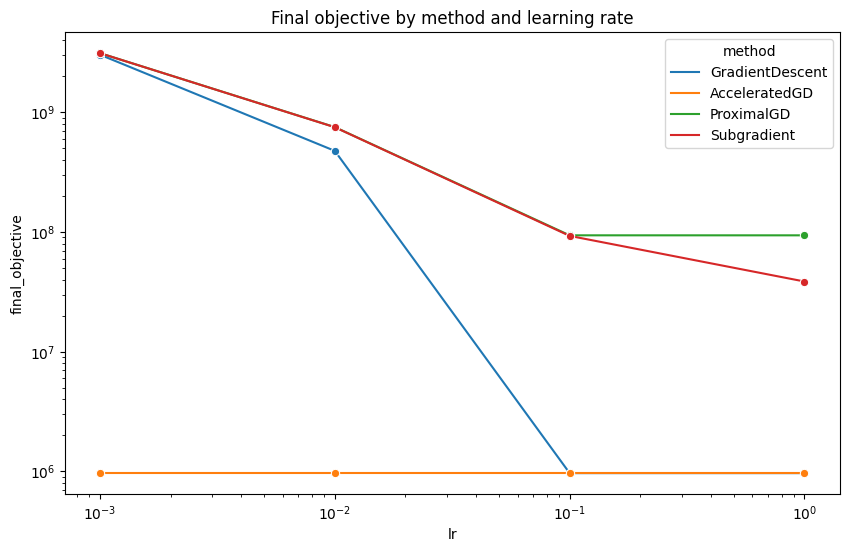

In [6]:
#plot the result of the gradient descent by method and by learning rate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='lr', y='final_objective', hue='method', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Final objective by method and learning rate')
plt.show()

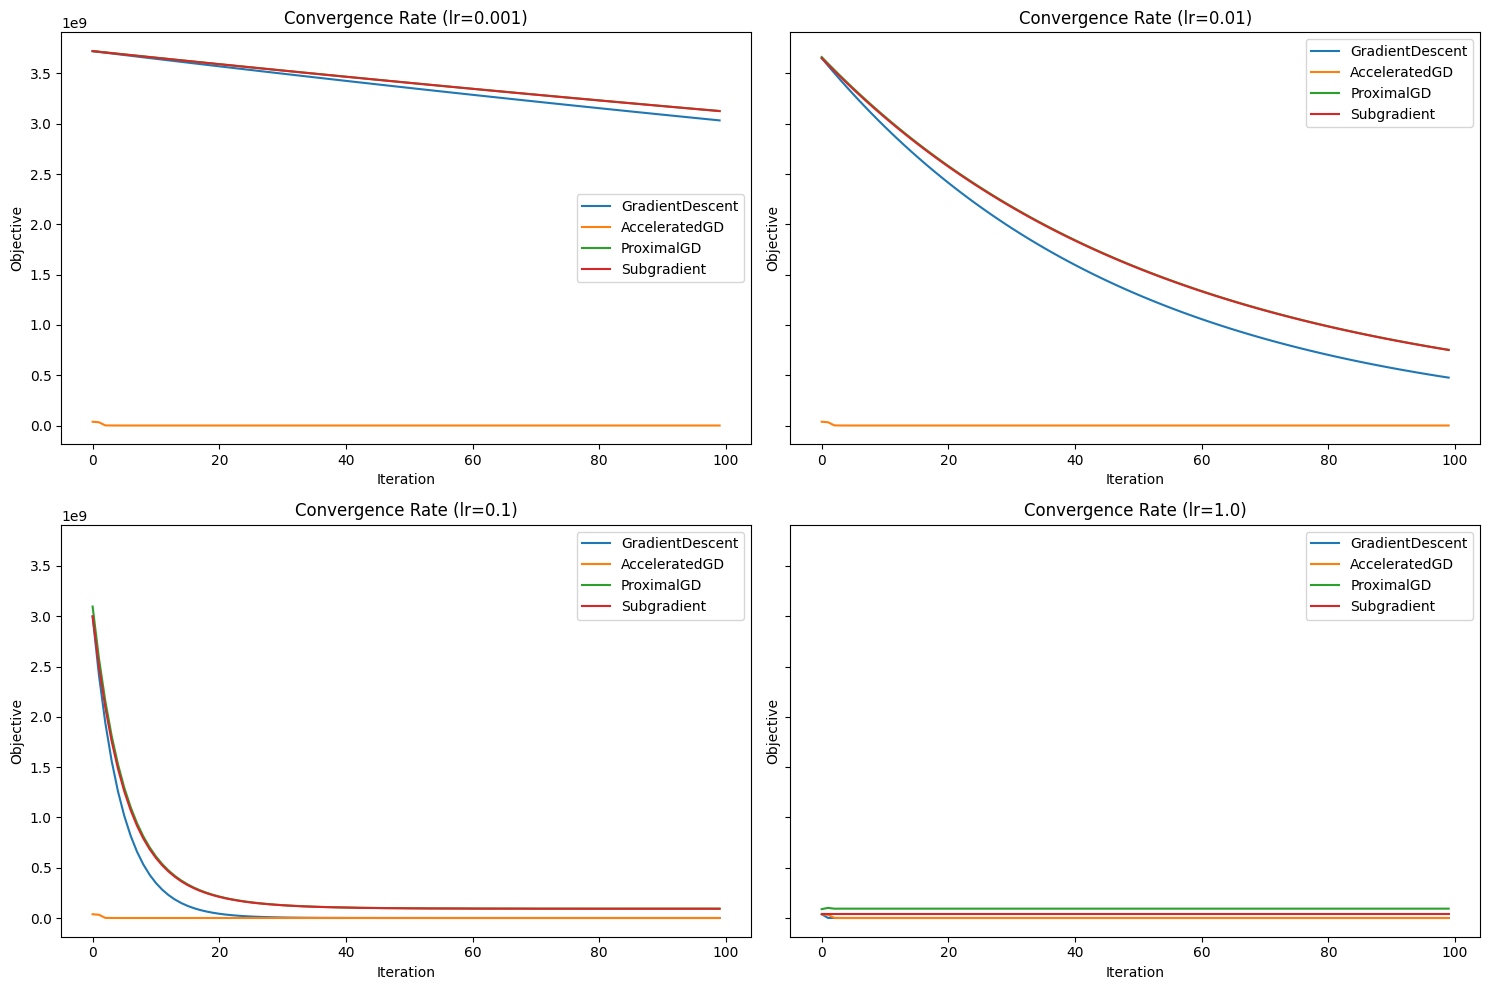

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for ax, lr in zip(axes, learning_rates):
    subset = df_results[df_results['lr'] == lr]
    for method in subset['method'].unique():
        method_data = subset[subset['method'] == method]
        for _, row in method_data.iterrows():
            ax.plot(range(num_iterations), row['objectives'], label=method)
    ax.set_title(f'Convergence Rate (lr={lr})')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Objective')
    ax.legend()

plt.tight_layout()
plt.show()